(Squared) Systems of linear equations - Exercises
===

In [1]:
import numpy as np
import numpy.linalg as nl
import scipy.linalg as sl
import matplotlib.pyplot as plt

1. Backward substitution
---

In [2]:
def bksolve(A: np.array, b: np.array) -> np.array:
    # Solve Ax = b assuming A is nonsingular upper
    # triangular matrix.
    n = b.size
    x = b.copy()  # to avoid distroying b -> can you tell why?

    # !! add tests for A[i,i] close to 0!!
    x[n-1] = b[n-1] / A[n-1,n-1]
    for i in np.arange(n-2, -1, -1):  # arange() here produces n-2, n-3, ..., 0
        x[i] = (b[i] - A[i, i+1:n] @ x[i+1:n]) / A[i,i]

    return x

Example:

In [3]:
A = np.array([[2,2,3,4],[0,5,6,7],[0,0,8,9],[0,0,0,10]])
b = np.array([20,34,25,10])

x = bksolve(A, b)
print('Solution: ', x)

# verify:
r = b - A @ x
print('Residuals: ', r)

Solution:  [2 3 2 1]
Residuals:  [0 0 0 0]


2. Forward substitution
---

In [4]:
def fwsolve(A: np.array, b: np.array) -> np.array:
    # Solve Ax = b assuming A is nonsingular lower
    # triangular matrix.
    # .......... your turn ....
    return x

Example:

3. LU factorization - experiment
---

Consider the system

$$
\begin{bmatrix}\epsilon & 1 \\ 1 & 1 \end{bmatrix}
\begin{bmatrix}x_1 \\ x_2\end{bmatrix} =
\begin{bmatrix}1 + \epsilon \\ 2 \end{bmatrix}
$$
with the solution $[1 \; 1]^T.$

We use LU factorization for $\epsilon=10^{-2}, 10^{-4},\dots, 10^{-18}$ for solving the system:

In [5]:
print('epsilon |         x[0]         |         x[1]')
print('--------+----------------------+-------------------')
for e in np.logspace(-2, -18, num=9):
    A = np.array([[e, 1], [1, 1]])
    b = np.array([1+e, 2])

    # It's easy to write by hand the LU factorization of A:
    L = np.array([[1, 0], [A[1,0]/A[0,0], 1]])
    U = np.array([[A[0,0], A[0,1]], [0, A[1,1]-L[1,0]*A[0,1]]])

    #...and also the solution:
    y = np.zeros(2)
    y[0] = b[0]
    y[1] = b[1] - L[1,0]*y[0]

    x = np.zeros(2)
    x[1] = y[1] / U[1,1]
    x[0] = (y[0] - U[0,1]*x[1]) / U[0,0]      # <- what is the value of U[0,0]?

    print('{:5.0e}   {:20.15f}   {:20.15f}'.format(e, x[0], x[1]))
    

epsilon |         x[0]         |         x[1]
--------+----------------------+-------------------
1e-02      1.000000000000001      1.000000000000000
1e-04      0.999999999999890      1.000000000000000
1e-06      1.000000000028756      1.000000000000000
1e-08      0.999999993922529      1.000000000000000
1e-10      1.000000082740371      1.000000000000000
1e-12      0.999866855977416      1.000000000000000
1e-14      0.999200722162641      1.000000000000000
1e-16      2.220446049250313      1.000000000000000
1e-18      0.000000000000000      1.000000000000000


4. Polynomial interpolation
---

Let $p(x)$ be a polynomial of degree $M$,
$p(x) = a_M x^M +\dots + a_1 x + a_0$. 
The interpolation problem requires finding 
$a_i$ such that
  \begin{align*}
  a_0 + a_1 x_0 + \dots + a_M x_0^M &= y_0 \\
  \dots \\
  a_0 + a_1 x_N + \dots + a_M x_N^M &= y_N
  \end{align*}
where $\{(x_i, y_i) | i =0,\dots, N\}$ are a set of points
to be interpolated.

**NOTE:** Below, the Vandermonde matrix (_V_) is generated explicitly. However,
you can use `numpy.ma.vander(x)` to achieve the same result. Pay attention to
the returned type of the matrix.

In [6]:
def polyinterp(x: np.array, y: np.array) -> np.array:
    n = x.size
    if y.size != n:
        raise RuntimeError('The two vectors must have the same length!')

    V = np.zeros((n, n))
    for k in np.arange(n):
        V[:,k] = x ** (n-k-1)

    a = np.linalg.solve(V, y)   # <- Solve the system using other functions/approaches!

    return a

Example:

In [7]:
x = np.array([-1,1,2])
y = np.array([2,6,11])
polyinterp(x, y)

array([1., 2., 3.])

The solution above corresponds to the polynomial
$$
p(x) = x^2 + 2x + 3.
$$
Let's plot it on a neighborhood of the points used for fitting:

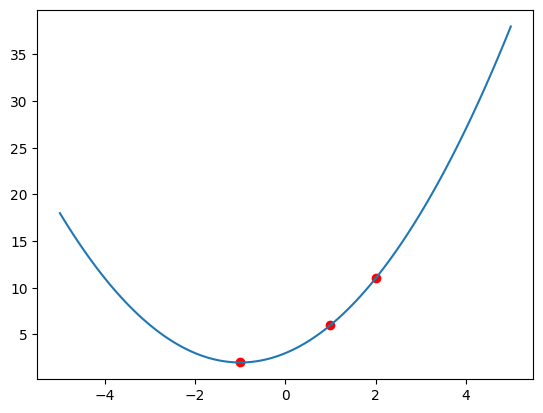

In [8]:
px = np.linspace(-5, 5, 100)
py = px**2 + 2*px + 3   # you can try also to use map(lambda z:..., px) - slower

plt.plot(px, py)
plt.scatter(x, y, s=36, c='red')